<a href="https://colab.research.google.com/github/PrasannaKumarPrabhu/pythonLearning/blob/main/Regression_Implementation_and_sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Multi-linear regression Implementation

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
def predict(X, weight):
  return np.dot(X,weight)

In [ ]:
def error(X,Y,weight):
  n = X.shape[0]
  Y_hat = predict(X,weight)
  e = np.sum((Y - Y_hat)**2)
  return e/n

In [ ]:
def gradient(X,Y, weight):
  n = X.shape[0]
  Y_hat = predict(X,weight)
  grad = np.dot(X.T, Y_hat - Y)
  return grad/n

In [ ]:
def gradient_descent(X,Y, learning_rate = 0.1, epochs = 100):
  d = X.shape[1]
  weight = np.zeros((d,))
  err_list = []

  for i in range(epochs):
    e = error(X,Y,weight)
    err_list.append(e)

    grad = gradient(X,Y,weight)
    weight = weight - learning_rate*grad

  return weight, err_list


In [ ]:
!gdown 1UpLnYA48Vy_lGUMMLG-uQE1gf_Je12Lh

Downloading...
From: https://drive.google.com/uc?id=1UpLnYA48Vy_lGUMMLG-uQE1gf_Je12Lh
To: /content/cars24-car-price-clean.csv
100% 7.10M/7.10M [00:00<00:00, 266MB/s]


In [ ]:
df = pd.read_csv('cars24-car-price-clean.csv')
df.head()

,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,-1.111046,-0.801317,1.195828,0.045745,-1.310754,-1.157780,0.801317,-0.433854,-1.125683,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
1,-0.223944,0.450030,-0.737872,-0.140402,-0.537456,-0.360203,-0.450030,-0.327501,-0.333227,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
2,-0.915058,-1.426990,0.035608,-0.582501,-0.537456,-0.404885,1.426990,-0.327501,-0.789807,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
3,-0.892365,-0.801317,-0.409143,0.329620,-0.921213,-0.693085,0.801317,-0.433854,-0.905265,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
4,-0.182683,0.137194,-0.544502,0.760085,0.042999,0.010435,-0.137194,-0.246579,-0.013096,-0.800710,-0.098382,1.014945,-0.020095,-0.056917,-0.975970,0.495818,0.444503,-0.424728


In [ ]:
Y = df['selling_price'].values

X = df[df.columns.drop('selling_price')]

X.head()

,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,-0.801317,1.195828,0.045745,-1.310754,-1.157780,0.801317,-0.433854,-1.125683,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
1,0.450030,-0.737872,-0.140402,-0.537456,-0.360203,-0.450030,-0.327501,-0.333227,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
2,-1.426990,0.035608,-0.582501,-0.537456,-0.404885,1.426990,-0.327501,-0.789807,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
3,-0.801317,-0.409143,0.329620,-0.921213,-0.693085,0.801317,-0.433854,-0.905265,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
4,0.137194,-0.544502,0.760085,0.042999,0.010435,-0.137194,-0.246579,-0.013096,-0.800710,-0.098382,1.014945,-0.020095,-0.056917,-0.975970,0.495818,0.444503,-0.424728


In [ ]:
print(X.shape, Y.shape)

(19820, 17) (19820,)


add x(0) to X

In [ ]:
ones = np.ones((X.shape[0],1))
X = np.hstack((ones,X))

In [ ]:
X.shape

(19820, 18)

In [ ]:
weight, err_list = gradient_descent(X,Y)

In [ ]:
weight

array([-5.11217932e-17,  8.76070088e-02, -2.05627076e-02, -5.24360643e-02,
        3.06503884e-02,  7.91173377e-02, -8.76070088e-02,  1.25960006e-01,
        6.50485630e-01, -1.84172981e-02, -4.23482707e-03,  2.76000052e-02,
        1.56662213e-02,  4.17807168e-03, -2.52214378e-02, -3.07030687e-02,
       -5.23923083e-03, -1.85044383e-03])

In [ ]:
weight.shape

(18,)

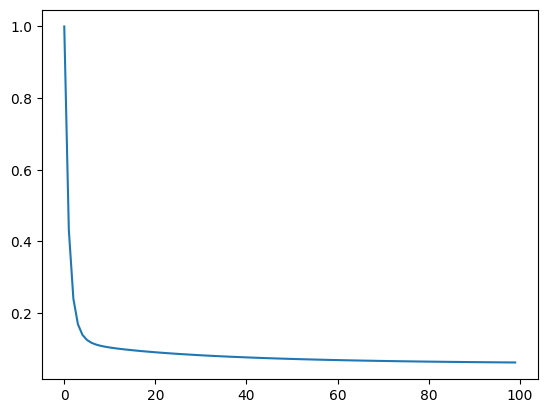

In [ ]:
fig = plt.figure()
plt.plot(err_list)
plt.show()

In [ ]:
Y_hat = predict(X,weight)
Y_hat

array([-1.1789936 , -0.29453589, -0.91667313, ..., -0.26030882,
       -0.9622889 ,  0.98914772])

In [ ]:
def r2_score_ud(Y,Y_hat):
  ssr = np.sum((Y-Y_hat)**2)
  sst = np.sum((Y-np.mean(Y))**2)
  return 1 - ssr/sst

In [ ]:
print(r2_score_ud(Y,Y_hat))

0.9385147408229634


calculate r2-score with a single feature

In [ ]:
X = df[['max_power','mileage','age']]

In [ ]:
X.shape

(19820, 3)

In [ ]:
ones = np.ones((X.shape[0],1))
X = np.hstack((ones,X))

In [ ]:
X.shape

(19820, 4)

In [ ]:
weight, err_list = gradient_descent(X,Y)

Y_hat = predict(X,weight)

print(r2_score_ud(Y,Y_hat))

0.7089958555801297


scikit learn implementation

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()

In [ ]:
Y = df['selling_price'].values
X = df[df.columns.drop('selling_price')].values

In [ ]:
model.fit(X,Y)

LinearRegression()

display the parameters of the model

In [ ]:
print(model.coef_)
print(model.intercept_)

[ 6.33860292e+10 -1.82189941e-02 -4.86839961e-02  3.13816980e-02
  2.73645062e-02  6.33860292e+10  6.07876506e-02  7.94149781e-01
 -1.69531423e-02 -3.47590617e-03  1.40814325e-02  1.27543583e-02
  2.83212318e-03 -2.25768595e-02 -1.29345257e-02 -2.46365460e-02
 -3.26575305e-02]
8.539587169074173e-05


In [ ]:
Y_hat = model.predict(X)

In [ ]:
print(r2_score_ud(Y,Y_hat))

0.709000239442724


get metrics using sklearn

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
print(r2_score(Y,Y_hat))

0.9421890705278853


In [ ]:
def adj_r2_score(Y,Y_hat,weight):
  ssr = np.sum((Y-Y_hat)**2)
  sst = np.sum((Y-np.mean(Y))**2)
  r2_score = 1-ssr/sst
  n = Y.shape[0]
  d = len(weight)
  return 1-((1-r2_score)*(n-1)/(n-d-1))

In [ ]:
print(adj_r2_score(Y, Y_hat, model.coef_))

0.9421394398945641
